# ゼロつく2 #1
以下を参考に動作確認しつつ学習を進める  
[『ゼロから作るDeep Learning 2』の学習ノート](https://www.anarchive-beta.com/entry/2020/08/28/190000)

## 1.1-2：ニューラルネットワークの推論

In [67]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3])
print(x.__class__) # xのクラスがndarray担っていることを確認

<class 'numpy.ndarray'>


In [68]:
print(x.shape) 
#１行３列の行列になる, １行のみの場合は(1, 3)ではなく(3,)となる
print(x.ndim)
# 次元数は１次元

(3,)
1


In [69]:
## 行列を作成
W = np.array([[1, 2, 3],[4, 5, 6]])
# 2行３列の形を確認
print(W.shape)
# 次元は２次元
print(W.ndim)

(2, 3)
2


### 1.2.1 ニューラルネットワークの推論の全体図

In [70]:
# 全結合層（Affine)の動作確認
# 入力
x = np.random.randn(1, 2) # 一行２列のランダムな数字の行列
print(x)
print(f"入力層の大きさは{x.shape}")

# 重み
W = np.random.randn(2, 4)
print(f"重みの大きさは{W.shape}")

# バイアス
b = np.random.randn(1, 4)
print(f"バイアスの大きさは{b.shape}")



[[-0.02047145  1.79161371]]
入力層の大きさは(1, 2)
重みの大きさは(2, 4)
バイアスの大きさは(1, 4)


In [71]:
# バッチサイズを指定
N = 10

## 全結合層の計算

# 入力を生成
x = np.random.randn(N, 2)
print(x.shape)

# 重みを生成
W = np.random.randn(2, 4)
print(W.shape)

# バイアスを生成
b = np.random.randn(1, 4)
print(b.shape)

# 隠れ層のニューロンを計算
h = np.dot(x, W) + b
print(h.shape)

(10, 2)
(2, 4)
(1, 4)
(10, 4)


In [72]:
# シグモイド関数の実装
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [73]:
# シグモイド関数による活性化
a = sigmoid(h)
print(np.round(h, 3))
print(np.round(a, 3))
print(a.shape)

[[ 0.775  1.462 -1.808  0.872]
 [ 0.476 -1.322  0.413 -2.152]
 [-1.218 -0.238 -0.4   -0.519]
 [ 1.754 -1.622  0.614 -2.807]
 [ 3.369  0.47  -1.094 -0.885]
 [ 0.968 -1.711  0.708 -2.709]
 [-1.521 -1.346  0.488 -1.676]
 [-1.124 -1.385  0.508 -1.819]
 [-2.311 -0.726  0.019 -0.787]
 [-0.621 -2.464  1.351 -3.147]]
[[0.685 0.812 0.141 0.705]
 [0.617 0.21  0.602 0.104]
 [0.228 0.441 0.401 0.373]
 [0.852 0.165 0.649 0.057]
 [0.967 0.615 0.251 0.292]
 [0.725 0.153 0.67  0.062]
 [0.179 0.207 0.62  0.158]
 [0.245 0.2   0.624 0.14 ]
 [0.09  0.326 0.505 0.313]
 [0.349 0.078 0.794 0.041]]
(10, 4)


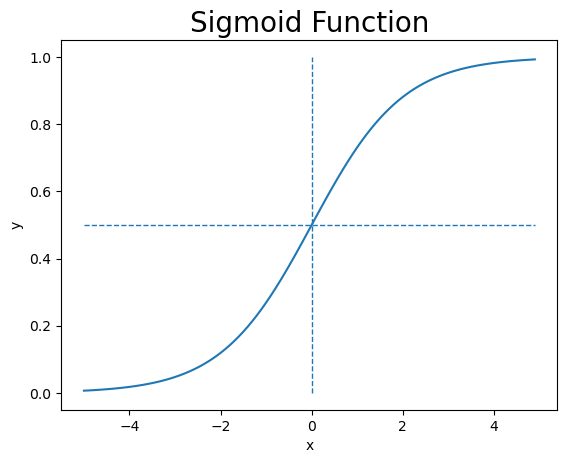

In [74]:
# x軸の値を生成
x = np.arange(-5, 5, 0.1)

# シグモイド関数の計算
y = sigmoid(x)

# 作図
plt.plot(x, y) # 点の位置
plt.hlines(y=0.5, xmin=np.min(x), xmax=np.max(x), linestyle='--', linewidth=1) # 水平線
plt.vlines(x=0, ymin=0, ymax=1, linestyle='--', linewidth=1) # 垂直線
plt.xlabel('x') # x軸ラベル
plt.ylabel('y') # y軸ラベル
plt.title('Sigmoid Function', fontsize=20) # タイトル
plt.show() # 描画

In [75]:
# ２層のニューラルネットワーク
N = 10

# 入力
x = np.random.randn(N, 2)

# 中間層1重み
W1 = np.random.randn(2, 4)
# 中間層1バイアス
b1 = np.random.randn(1, 4)
# 中間層1重み付き和
h1 = np.dot(x, W1) + b1

a = sigmoid(h1)

# 中間層2重み
W2 = np.random.randn(4, 3)
# 中間層2バイアス
b2 = np.random.randn(1, 3)
# 中間層2重み付き和
h2 = np.dot(a, W2) + b2

print(h1.shape)
print(a.shape)
print(h2.shape)


(10, 4)
(10, 4)
(10, 3)


In [76]:
#シグモイドレイヤ
class Sigmoid:
    # 初期化メソッド
    def __init__(self):
        self.params = []
    
    def forward(self,x):
        return 1 / (1 + np.exp(-x))

# Affineレイヤ
class Affine:
    # 初期化
    def __init__(self, W, b):
        self.params = [W, b] # パラメータ
    
    def forward(self, x):
        W, b = self.params 
        out = np.dot(x, W) + b
        return out

In [77]:
# SigmoidとAffineを用いて２層のニューラルネットワークを作成
# バッチサイズを指定
N = 10

# 入力を生成
x = np.random.randn(N, 2)

# 第1層のパラメータ
W1 = np.random.randn(2, 4)
b1 = np.random.randn(1, 4)

# 第2層のパラメータ
W2 = np.random.randn(4, 3)
b2 = np.random.randn(1, 3)

In [78]:
# 各レイヤをリストに格納
layers = [Affine(W1, b1),
        Sigmoid(),
        Affine(W2, b2)]

print(layers)

[<__main__.Affine object at 0x10f5f60e0>, <__main__.Sigmoid object at 0x10f41c130>, <__main__.Affine object at 0x10f41cf40>]


In [79]:
for layer in layers:
    x = layer.forward(x)
    print(x.shape)

(10, 4)
(10, 4)
(10, 3)


In [80]:
class TwoLayerNet():
    # 初期化
    def __init__(self, input_size, hidden_size, output_size):
        # 各レイヤのニューロン数
        I, H, O = input_size, hidden_size, output_size
        # 第１層のパラメータ
        W1 = np.random.randn(I, H)
        b1 = np.random.randn(H)
        # 第２層のパラメータ
        W2 = np.random.randn(H, O)
        b2 = np.random.randn(O)
        
        #レイヤ゙の作成
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
            ]
        
        # 各パラメータのリストを結合
        self.params = []
        for layer in self.layers:
            self.params += layer.params
    
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

In [81]:
N = 10

x = np.random.randn(N, 2)

model = TwoLayerNet(input_size=2, hidden_size=4, output_size=3)
y = model.predict(x)
y.shape

(10, 3)

### 1-3 損失関数

In [82]:
# Softmax関数の実装
def softmax(x):
    # データの形状により条件分岐
    if x.ndim == 2: # 2次元配列のとき
        x = x - x.max(axis=1, keepdims=True) # オーバーフロー対策
        x = np.exp(x) # 式(1.6)の分子
        x /= x.sum(axis=1, keepdims=True) # 式(1.6)
    if x.ndim == 1: # 1次元配列のとき
        x = x - np.max(x) # オーバーフロー対策
        x = np.exp(x) / np.sum(np.exp(x)) # 式(1.6)
    
    return x

In [83]:
# 仮のスコアを生成
s = np.arange(-5, 5)
print(s)

# Softmax関数による正規化
y = softmax(s)
print(np.round(y, 3))
print(np.sum(y))

[-5 -4 -3 -2 -1  0  1  2  3  4]
[0.    0.    0.001 0.002 0.004 0.012 0.031 0.086 0.233 0.632]
1.0


In [84]:
# 交差エントロピー誤差の実装
def cross_entropy_error(y, t):
    # 2次元配列に変形
    if y.ndim == 1: # 1次元配列のとき
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    # 正解ラベルのインデックスに変換
    if t.size == y.size: # one-hotベクトルのとき
        t = t.argmax(axis=1)
    
    # バッチサイズを取得
    batch_size = y.shape[0]
    
    # 交差エントロピー誤差を計算
    return - np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size # 式(1.8)

In [85]:
# 正解のインデックス
k = 9

# 仮の教師ラベル
t = np.zeros_like(y)
t[k] = 1
print(t)

L = cross_entropy_error(y, t)
print(L) # 交差エントロピー誤差が小さい->誤差が小さい（正解）

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0.4586295862362355


### MatMulレイヤ

In [86]:
# MatMulレイヤの実装
class MatMul:
    # 初期化
    def __init__(self, W):
        self.params = [W]
        self.grad = [np.zeros_like(W)]
        self.x = None
    
    def forward(self, x):
        # 重みを取得
        W, = self.params
        
        # 行列の積
        out = np.dot(x, W)
        
        # 入力を保存
        self.x = x
        
        return out
    
    def backward(self, dout):
        # 重みを取得
        W, = self.params
        
        # 勾配を取得
        dx = np.dot(dout, W.T)
        dW = no.dot(self.x.T, dout)
        
        # 勾配を格納
        self.grads[0][...] = dW
        
        return dx
        

In [89]:
# 実装したMatMalを使用してみる
N = 10  # バッチサイズ
D = 15  # 1レイヤのニューロン
H =5    # 2レイヤのニューロン

# 入力を生成
x = np.random.randn(N, D)
print(x.shape)

# 重み
W = np.random.randn(D, H)
print(W.shape)

# インスタンス生成
matmal_layer = MatMul(W)

(10, 15)
(15, 5)
